In [122]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

import genutils
import os
import sys
import numpy as np
import re
import scipy 
import matplotlib.patches as patches


In [2]:
amyDir = '/home/ampend/kidd-lab/ampend-projects/Angela/amy2b/'
#The below table was generated from Sarah Emery's ddPCR estimates of the AMY2b, 1.9Mb, and 2.0Mb duplication targets
amyfile = amyDir + 'input/ddPCR_AMY2B_ResultsTable.txt'

In [3]:
#READ DEPTH CN DATA
def get_amy_cn(dog,cnData):
    for w in cnData[dog]:
        CN_amy = float(w[2])
        return CN_amy
def get_19_cn(dog,cnData):
    for w in cnData[dog]:
        CN_19 = float(w[3])
        return CN_19
def get_20_cn(dog,cnData):
    for w in cnData[dog]:
        CN_2 = float(w[4])
        return CN_2
#ddPCR DATA
def get_amy_dd(dog,ddData):
    for w in ddData[dog]:
        CN_amy = float(w[2])
        return CN_amy
def get_19_dd(dog,ddData):
    for w in ddData[dog]:
        CN_19 = float(w[3])
        return CN_19
def get_20_dd(dog,ddData):
    for w in ddData[dog]:
        CN_2 = float(w[4])
        return CN_2

In [4]:
#Determining the order I want to plot the dogs in for the bar plot FOR ddPCR ONLY
plotOrder = []

#inFile = open('sample-plot-order.txt')
inFile = open(amyDir + 'input/' + 'sample-plot-order.txt')
for line in inFile:
    line = line.rstrip()
    line = line.split('\t')
    plotOrder.append([line[0],line[1],line[2]])
inFile.close()

In [5]:
amyFile = open(amyfile, 'r')

data = {}
data['dog'] = []
data['desc'] = []
data['CN_amy'] = []
data['CN_19'] = []
data['CN_2'] = []

ddData = {}

for line in amyFile:
    line = line.rstrip()
    line =  line.split('\t')
    if 'Dog' in line[0]:
        continue #skips header line
    dog,sex,desc,canineType,CN_amy,CN_19, CN_2 = line[0:]
    data['dog'].append(dog)
    data['desc'].append(desc)
    data['CN_amy'].append(CN_amy)
    data['CN_19'].append(CN_19)
    data['CN_2'].append(CN_2)
    #diff approach
    ddData[dog] = []
    ddData[dog].append([dog,desc,CN_amy, CN_19, CN_2])
ddData[dog].sort()
    
print 'Read ddPCR information for %i dogs into the dataframe' % len(data['dog'])

Read ddPCR information for 90 dogs into the dataframe


In [291]:
for i in range(len(plotOrder)):
    print '%s\t%s\t%.3f\t%.3f\t%.3f' % (plotOrder[i][0], plotOrder[i][1], get_amy_dd(plotOrder[i][0],ddData), get_19_dd(plotOrder[i][0],ddData),get_20_dd(plotOrder[i][0],ddData))

HR85	Hungary 1	12.300	2.130	1.930
HR93	Hungary 2	10.870	2.120	2.010
PT49	Portugal 3	11.900	2.180	1.840
PT61	Portugal 4	10.090	2.120	1.880
PT71	Portugal 5	11.900	2.180	1.920
EG44	Egypt 1	11.100	2.090	1.900
EG49	Egypt 2	8.460	2.050	1.970
QA5	Qatar 1	12.700	2.060	1.850
QA27	Qatar 1	17.700	3.270	1.830
LB74	Lebanon 1	13.800	2.020	1.880
LB79	Lebanon 2	15.500	2.070	1.870
LB85	Lebanon 3	12.000	1.930	1.860
NA8	Namibia 1	15.900	2.120	1.770
NA63	Namibia 2	12.000	2.180	1.780
NA89	Namibia 3	14.100	3.280	2.870
IN18	Borneo 1	12.100	2.160	1.860
IN23	Borneo 2	11.300	2.200	2.190
IN29	Borneo 3	10.700	2.130	1.980
ID60	India 1	9.510	2.050	1.900
ID91	India 2	10.800	1.950	1.800
ID125	India 3	10.200	2.260	2.040
ID137	India 4	9.560	2.070	1.870
ID165	India 5	12.300	2.140	1.900
ID168	India 6	10.500	2.020	1.850
TW04	Taiwan	10.760	2.240	1.830
VN4	Vietnam 1	10.500	1.950	1.790
VN21	Vietnam 2	8.530	2.110	1.860
VN37	Vietnam 3	6.940	1.860	1.860
VN42	Vietnam 4	10.690	2.010	1.780
VN59	Vietnam 5	5.230	2.230	1.960
VN76	Vie

In [6]:
print 'Finding the dogs that have large-scale duplications at the 1.9mb or 2.0mb size'
samplesWithDup = []
samplesWith2Dup = []
samplesWith19Dup = []

for i in range(len(plotOrder)):
    dogID = plotOrder[i][0]
    if get_19_cn(plotOrder[i][0],ddData) > 2.25 or get_20_cn(plotOrder[i][0],ddData) > 2.25:
            samplesWithDup.append(dogID)
            #print '%s\t%s\t%.3f\t%.3f\t%.3f' % (plotOrder[i][0], plotOrder[i][2], get_amy_dd(plotOrder[i][0],ddData), get_19_dd(plotOrder[i][0],ddData),get_20_dd(plotOrder[i][0],ddData))
    if get_19_cn(plotOrder[i][0],ddData) > 2.25 and get_20_cn(plotOrder[i][0],ddData) < 2.25:
            samplesWith19Dup.append(dogID)
            #print '%s\t%s\t%.3f\t%.3f\t%.3f' % (plotOrder[i][0], plotOrder[i][2], get_amy_dd(plotOrder[i][0],ddData), get_19_dd(plotOrder[i][0],ddData),get_20_dd(plotOrder[i][0],ddData))
    if get_20_cn(plotOrder[i][0],ddData) > 2.25:
            samplesWith2Dup.append(dogID)

Finding the dogs that have large-scale duplications at the 1.9mb or 2.0mb size


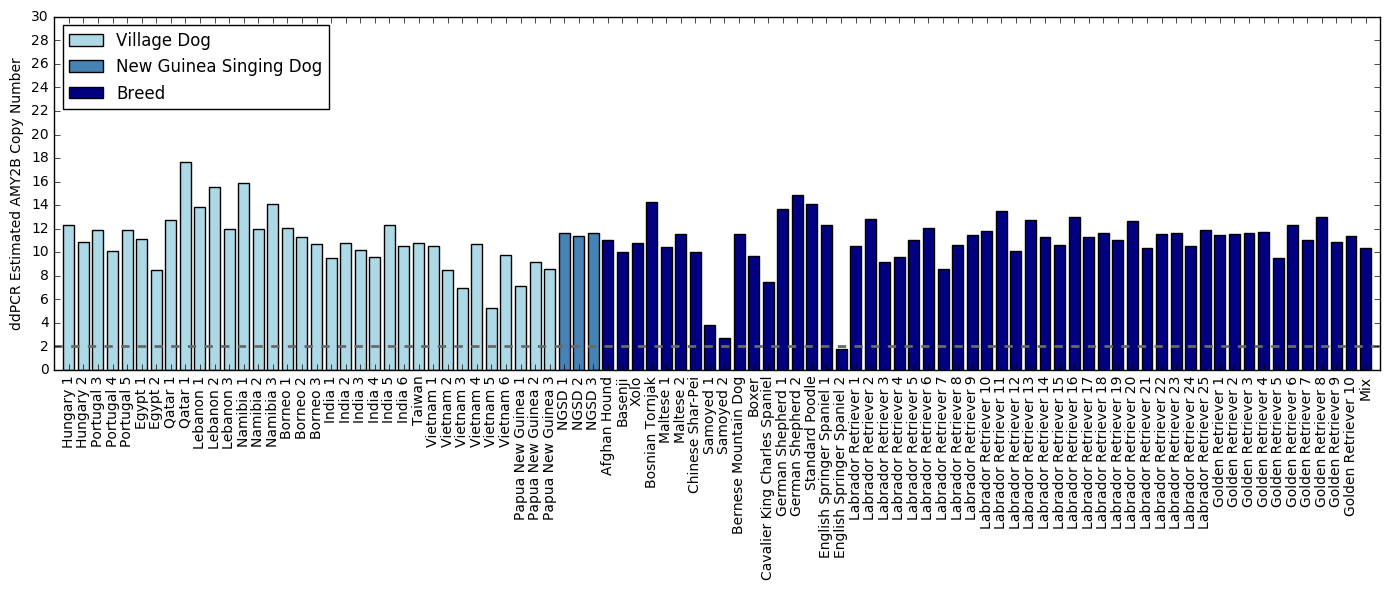

In [7]:
labelFont  = {'fontname':'Arial'}


width = .75

names = []
ticks = []
labels = {}
labels['Fox']  =1 
plt.figure(figsize=(14,6))
for i in range(len(plotOrder)):
    if plotOrder[i][2] == 'Fox':
        color = 'lightgreen'
    elif plotOrder[i][2] == 'Jackal':
        color = 'lightgreen'
    elif plotOrder[i][2] == 'Coyote':
        color = 'darkgreen'
    elif plotOrder[i][2] == 'Wolf':
        color = 'darkorange'
    elif plotOrder[i][2] == 'AncientDog':
        color = 'red'
    elif plotOrder[i][2] == 'Village Dog':
        color = 'lightblue'
    elif plotOrder[i][2] == 'Breed':
        color = 'navy'
    elif plotOrder[i][2] == 'New Guinea Singing Dog':
        color = 'steelblue'
    else:
        color = 'pink'
    if plotOrder[i][2] in labels:        
        _ = plt.bar(i,get_amy_dd(plotOrder[i][0],ddData),width,align='center',color=color)
    else:
        l = plotOrder[i][2]
        labels[l] = 1
        if l == 'Jackal':
            l = 'Fox and Jackal'
            
        if l == 'AncientDog':
            l = 'Ancient Dog'

        if l == 'VillageDog':
            l = 'Village Dog'

            
            
        _ = plt.bar(i,get_amy_dd(plotOrder[i][0],ddData),width,align='center',color=color,label=l)
    names.append(plotOrder[i][1])
    ticks.append(i)


_ =plt.xticks(ticks,names,rotation=90)
_= plt.xlim([-1,ticks[-1]+1])
_ = plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
_ = plt.ylim([0,30])

plt.legend(loc=2)

plt.axhline(y=2,color='dimgrey',linestyle='--',linewidth=2)
plt.ylabel('ddPCR Estimated AMY2B Copy Number')
#plt.title('ddPCR Estimated AMY2B Duplication Copy Number')

plt.tight_layout()
plt.savefig(amyDir + 'results/' + 'amy2b_CN_barplot_ddPCR.png')

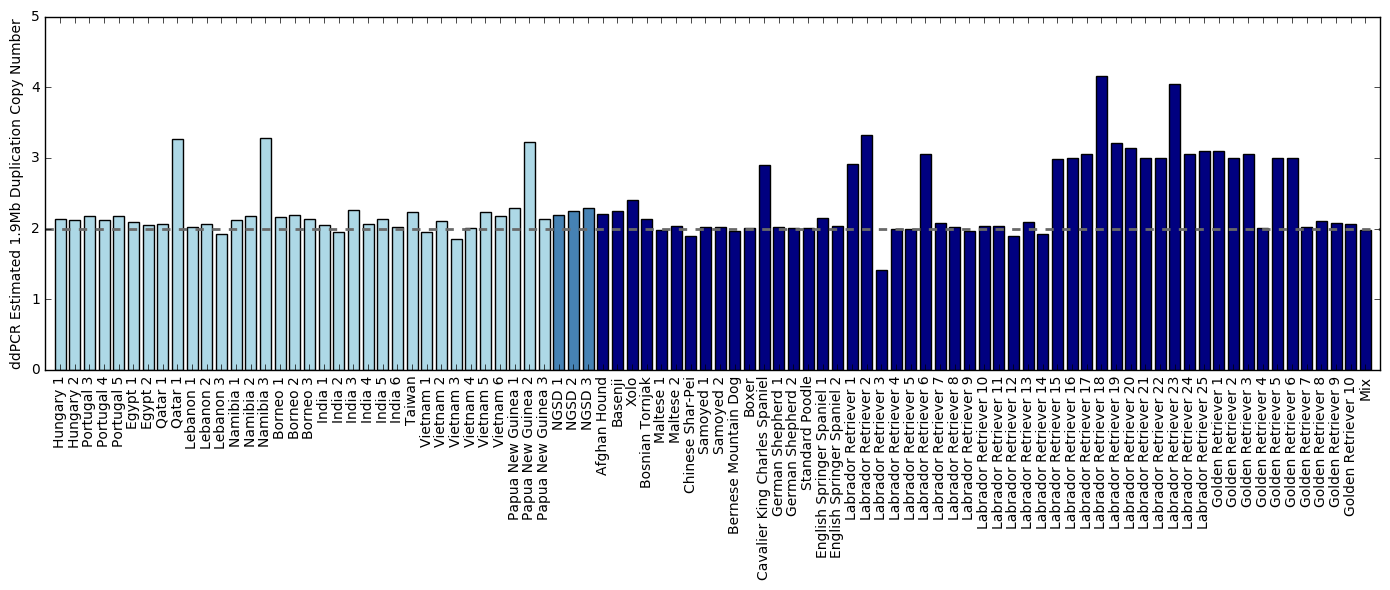

In [294]:
labelFont  = {'fontname':'Arial'}


width = .75

names = []
ticks = []
labels = {}
labels['Fox']  =1 
plt.figure(figsize=(14,6))
for i in range(len(plotOrder)):
    if plotOrder[i][2] == 'Fox':
        color = 'lightgreen'
    elif plotOrder[i][2] == 'Jackal':
        color = 'lightgreen'
    elif plotOrder[i][2] == 'Coyote':
        color = 'darkgreen'
    elif plotOrder[i][2] == 'Wolf':
        color = 'darkorange'
    elif plotOrder[i][2] == 'AncientDog':
        color = 'red'
    elif plotOrder[i][2] == 'Village Dog':
        color = 'lightblue'
    elif plotOrder[i][2] == 'Breed':
        color = 'navy'
    elif plotOrder[i][2] == 'New Guinea Singing Dog':
        color = 'steelblue'
    else:
        color = 'pink'
    if plotOrder[i][2] in labels:        
        _ = plt.bar(i,get_19_dd(plotOrder[i][0],ddData),width,align='center',color=color)
    else:
        l = plotOrder[i][2]
        labels[l] = 1
        if l == 'Jackal':
            l = 'Fox and Jackal'
            
        if l == 'AncientDog':
            l = 'Ancient Dog'

        if l == 'VillageDog':
            l = 'Village Dog'

            
            
        _ = plt.bar(i,get_19_dd(plotOrder[i][0],ddData),width,align='center',color=color,label=l)
    names.append(plotOrder[i][1])
    ticks.append(i)

#ticks with names
_ =plt.xticks(ticks,names,rotation=90)
_= plt.xlim([-1,ticks[-1]+1])
_ = plt.yticks([0,1,2,3,4,5])
_ = plt.ylim([0,5])

#plt.legend(loc=2)

plt.axhline(y=2,color='dimgrey',linestyle='--',linewidth=2)
plt.ylabel('ddPCR Estimated 1.9Mb Duplication Copy Number')
#plt.title('ddPCR Estimated 1.9Mb Duplication Copy Number')
plt.tight_layout()
plt.savefig(amyDir + 'results/' + '19Mb_CN_barplot_ddPCR.png')

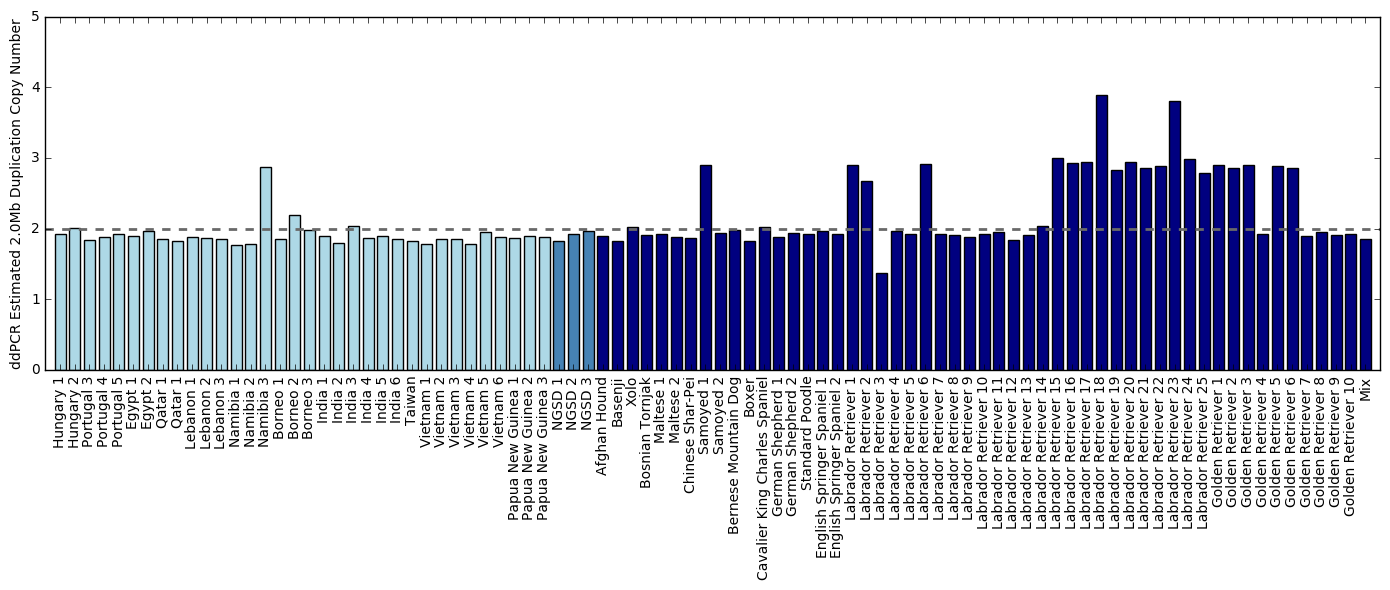

In [295]:
labelFont  = {'fontname':'Arial'}


width = .75

names = []
ticks = []
labels = {}
labels['Fox']  =1 
plt.figure(figsize=(14,6))
for i in range(len(plotOrder)):
    if plotOrder[i][2] == 'Fox':
        color = 'lightgreen'
    elif plotOrder[i][2] == 'Jackal':
        color = 'lightgreen'
    elif plotOrder[i][2] == 'Coyote':
        color = 'darkgreen'
    elif plotOrder[i][2] == 'Wolf':
        color = 'darkorange'
    elif plotOrder[i][2] == 'AncientDog':
        color = 'red'
    elif plotOrder[i][2] == 'Village Dog':
        color = 'lightblue'
    elif plotOrder[i][2] == 'Breed':
        color = 'navy'
    elif plotOrder[i][2] == 'New Guinea Singing Dog':
        color = 'steelblue'
    else:
        color = 'pink'
    if plotOrder[i][2] in labels:        
        _ = plt.bar(i,get_20_dd(plotOrder[i][0],ddData),width,align='center',color=color)
    else:
        l = plotOrder[i][2]
        labels[l] = 1
        if l == 'Jackal':
            l = 'Fox and Jackal'
            
        if l == 'AncientDog':
            l = 'Ancient Dog'

        if l == 'VillageDog':
            l = 'Village Dog'

            
            
        _ = plt.bar(i,get_20_dd(plotOrder[i][0],ddData),width,align='center',color=color,label=l)
    names.append(plotOrder[i][1])
    ticks.append(i)


_ =plt.xticks(ticks,names,rotation=90)
_= plt.xlim([-1,ticks[-1]+1])
_ = plt.yticks([0,1,2,3,4,5])
_ = plt.ylim([0,5])

#plt.legend(loc=2)

plt.axhline(y=2,color='dimgrey',linestyle='--',linewidth=2)
plt.ylabel('ddPCR Estimated 2.0Mb Duplication Copy Number')
#plt.title('ddPCR Estimated 2.0Mb Duplication Copy Number')
plt.tight_layout()
plt.savefig(amyDir + 'results/' + '20Mb_CN_barplot_ddPCR.png')

In [8]:
def get_chr6_region(sn,cnData):
    x = []
    y = []
    for w in cnData[sn]:
        if w[0] == 'chr6':
            if x == []:
                x.append(w[1])
            x.append(w[2])
            y.append(w[3])
    y.append(y[-1])        
    return (x,y)

def get_amy_cn(sn,cnData):
    for w in cnData[sn]:
        if w[0] == 'chr6' and w[1] == 46952541:
            return w[3]

def get_amy_cn_unk(sn,cnData):
    for w in cnData[sn]:
        if w[0] == 'chrUn_AAEX03020568' and w[1] == 4873:
            return w[3]


def get_duplication_cn(sn,cnData):
    dupPos = [45193930,47107035]
    tot = 0
    numWind = 0
    for w in cnData[sn]:
        if w[0] == 'chr6' and w[1] >= dupPos[0] and w[2] <= dupPos[1]:
            tot += w[3]
            numWind += 1
    m = float(tot)/float(numWind)
    return m

In [9]:
import glob
dataDir = '/home/jmkidd/kidd-lab/jmkidd-projects/dogs/ancient-dog/wssd/'
fileList = glob.glob(dataDir + 'make-correct-depths/27july/3kb-windows-genome-regions/*amylase')

cnData = {}
for f in fileList:
    sn = f.split('/')[-1]
    sn = sn.split('.')[0]
    
    for i,items in enumerate(plotOrder):
        sampleID = plotOrder[i][0]
        if sampleID == sn:
            cnData[sn] = []
        else:
            continue
        inFile = open(f,'r')
        for line in inFile:
            line = line.rstrip()
            line = line.split()
            c = line[3]
            b = int(line[4])
            e = int(line[5])
            cn = float(line[6])
            cnData[sn].append([c,b,e,cn])
        # now, sort
        cnData[sn].sort()

In [10]:
print 'DogID\tDesc\tReadDepth_Dupe\tReadDepth_AMY2B\tddPCR_AMY2B\tddPCR_1.9Mb\tddPCR2.0Mb'

mergedData = []

for i in range(len(plotOrder)):
    for keys in cnData:
        if plotOrder[i][0] == keys:
            print '%s\t%s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' % (plotOrder[i][0], plotOrder[i][2], get_duplication_cn(plotOrder[i][0],cnData), get_amy_cn_unk(plotOrder[i][0],cnData),get_amy_dd(plotOrder[i][0],ddData),get_19_dd(plotOrder[i][0],ddData),get_20_dd(plotOrder[i][0],ddData))
            mergedData.append([plotOrder[i][0], plotOrder[i][2], get_duplication_cn(plotOrder[i][0],cnData), get_amy_cn_unk(plotOrder[i][0],cnData),get_amy_dd(plotOrder[i][0],ddData),get_19_dd(plotOrder[i][0],ddData),get_20_dd(plotOrder[i][0],ddData)])

DogID	Desc	ReadDepth_Dupe	ReadDepth_AMY2B	ddPCR_AMY2B	ddPCR_1.9Mb	ddPCR2.0Mb
HR85	Village Dog	2.110	15.542	12.300	2.130	1.930
HR93	Village Dog	1.883	11.173	10.870	2.120	2.010
PT49	Village Dog	1.904	12.165	11.900	2.180	1.840
PT61	Village Dog	1.943	11.373	10.090	2.120	1.880
PT71	Village Dog	1.908	12.944	11.900	2.180	1.920
EG44	Village Dog	1.891	13.086	11.100	2.090	1.900
EG49	Village Dog	1.958	11.555	8.460	2.050	1.970
QA5	Village Dog	1.938	14.155	12.700	2.060	1.850
QA27	Village Dog	3.221	21.261	17.700	3.270	1.830
LB74	Village Dog	2.147	14.657	13.800	2.020	1.880
LB79	Village Dog	2.170	18.978	15.500	2.070	1.870
LB85	Village Dog	1.925	13.189	12.000	1.930	1.860
NA8	Village Dog	1.962	17.553	15.900	2.120	1.770
NA63	Village Dog	1.914	11.716	12.000	2.180	1.780
NA89	Village Dog	3.140	18.516	14.100	3.280	2.870
IN18	Village Dog	1.942	13.350	12.100	2.160	1.860
IN23	Village Dog	1.890	28.835	11.300	2.200	2.190
IN29	Village Dog	1.911	11.261	10.700	2.130	1.980
ID60	Village Dog	1.906	9.915	9.510	2.050	1.9

In [11]:
samplesWithDup = []
for i in range(len(plotOrder)):
    for keys in cnData:
        if plotOrder[i][0] == keys:
            if get_duplication_cn(plotOrder[i][0],cnData) < 2.25:
                continue
            samplesWithDup.append(keys)
            print '%s\t%s\t%.3f\t%.3f' % (plotOrder[i][0], plotOrder[i][2], get_duplication_cn(plotOrder[i][0],cnData), get_amy_cn_unk(plotOrder[i][0],cnData))

QA27	Village Dog	3.221	21.261
NA89	Village Dog	3.140	18.516
PG115	Village Dog	3.260	11.793
2972	Breed	2.936	12.908


In [12]:
df = pd.DataFrame(mergedData) #read in as pandas dataframe
df.columns = ['Dog', 'Description', 'Dupe_RD','AMY2B_RD','AMY2B_ddPCR','1.9Mb_ddPCR','2.0Mb_ddPCR'] #rename column names
print df #prints off first five lines of dataframe

print '%i dogs were analyzed for ddPCR that have RD data' % (len(df))


        Dog  Description   Dupe_RD  AMY2B_RD  AMY2B_ddPCR  1.9Mb_ddPCR  \
0      HR85  Village Dog  2.110000    15.542        12.30         2.13   
1      HR93  Village Dog  1.883027    11.173        10.87         2.12   
2      PT49  Village Dog  1.904475    12.165        11.90         2.18   
3      PT61  Village Dog  1.943012    11.373        10.09         2.12   
4      PT71  Village Dog  1.907541    12.944        11.90         2.18   
5      EG44  Village Dog  1.891128    13.086        11.10         2.09   
6      EG49  Village Dog  1.957872    11.555         8.46         2.05   
7       QA5  Village Dog  1.937899    14.155        12.70         2.06   
8      QA27  Village Dog  3.221451    21.261        17.70         3.27   
9      LB74  Village Dog  2.146794    14.657        13.80         2.02   
10     LB79  Village Dog  2.169537    18.978        15.50         2.07   
11     LB85  Village Dog  1.925054    13.189        12.00         1.93   
12      NA8  Village Dog  1.962066    

rvalue:  0.922318395779
pvalue:  1.94307982098e-16


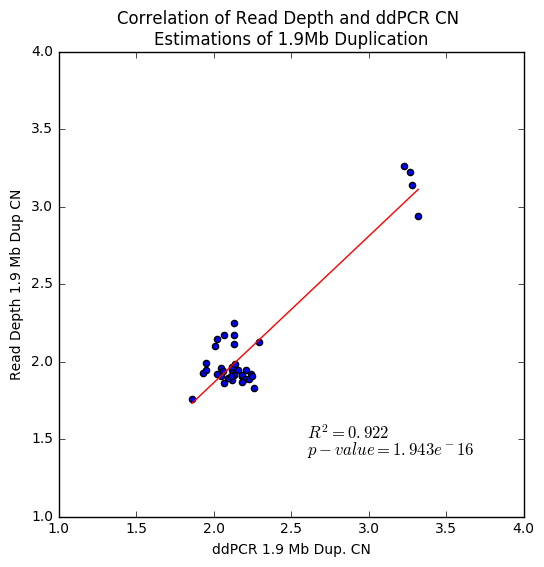

In [87]:
fig = plt.figure(figsize=(10,10))

ax = df.plot(kind='scatter', x='1.9Mb_ddPCR', y='Dupe_RD', ylim=(1,4),xlim=(1,4),figsize=(6,6),title="Correlation of Read Depth and ddPCR CN \nEstimations of 1.9Mb Duplication")
ax.set_xlabel("ddPCR 1.9 Mb Dup. CN")
ax.set_ylabel("Read Depth 1.9 Mb Dup CN")

#to find line of best fit
x=df['1.9Mb_ddPCR']
y=df['Dupe_RD']
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
#calculate r2
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print 'rvalue: ',r_value
print 'pvalue: ',p_value
ax.text(2.6,1.5,r'$R^2 = 0.922$',fontsize=12)
ax.text(2.6,1.4,r'$p-value = 1.943e^-16$',fontsize=12)

rvalue:  0.720271803054
pvalue:  3.42946634745e-07


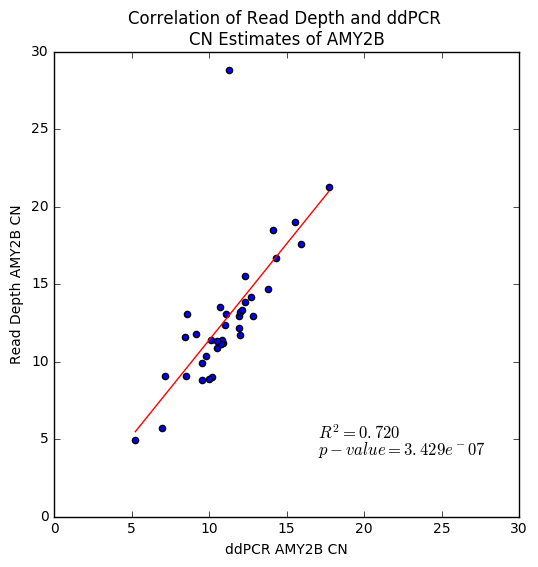

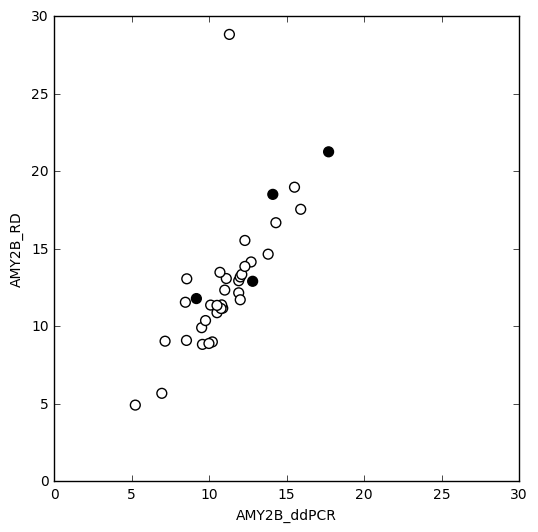

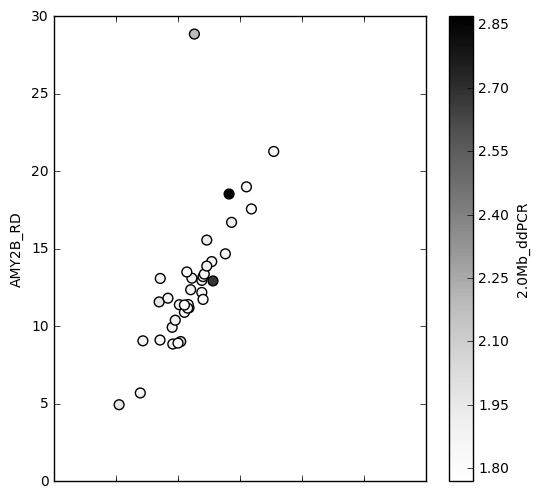

In [83]:
fig = plt.figure(figsize=(10,10))

ax = df.plot(kind='scatter', y='AMY2B_RD', x='AMY2B_ddPCR', ylim=(0,30),xlim=(0,30),figsize=(6,6),title="Correlation of Read Depth and ddPCR \nCN Estimates of AMY2B")
ax.set_ylabel("Read Depth AMY2B CN")
ax.set_xlabel("ddPCR AMY2B CN")

#to find line of best fit
y=df['AMY2B_RD']
x=df['AMY2B_ddPCR']
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
#calculate r2
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print 'rvalue: ',r_value
print 'pvalue: ',p_value
ax.text(17,5,r'$R^2 = 0.720$',fontsize=12)
ax.text(17,4,r'$p-value = 3.429e^-07$',fontsize=12)

#Plot samples 
c = [int(float(x)+.5) for x in df['1.9Mb_ddPCR']]
df.plot(kind='scatter', y='AMY2B_RD', x='AMY2B_ddPCR',c=c, s=50, ylim=(0,30),xlim=(0,30),figsize=(6,6));

c = [int(float(x)+.5) for x in df['1.9Mb_ddPCR']]
df.plot(kind='scatter', y='AMY2B_RD', x='AMY2B_ddPCR',c='2.0Mb_ddPCR', s=50, ylim=(0,30),xlim=(0,30),title="",figsize=(6,6));

In [121]:
print 'DogID\tDesc\tddPCR_AMY2B\tddPCR_1.9Mb\tddPCR2.0Mb'

ddDf = []

for i in range(len(plotOrder)):
    for keys in cnData:
        if plotOrder[i][0] == keys:
            print '%s\t%s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' % (plotOrder[i][0], plotOrder[i][2],get_amy_dd(plotOrder[i][0],ddData),get_19_dd(plotOrder[i][0],ddData),get_20_dd(plotOrder[i][0],ddData))
            mergedData.append([plotOrder[i][0], plotOrder[i][2],get_amy_dd(plotOrder[i][0],ddData),get_19_dd(plotOrder[i][0],ddData),get_20_dd(plotOrder[i][0],ddData)])

DogID	Desc	ddPCR_AMY2B	ddPCR_1.9Mb	ddPCR2.0Mb


TypeError: list indices must be integers, not str

rvalue:  0.302732285791
pvalue:  0.0646825904518


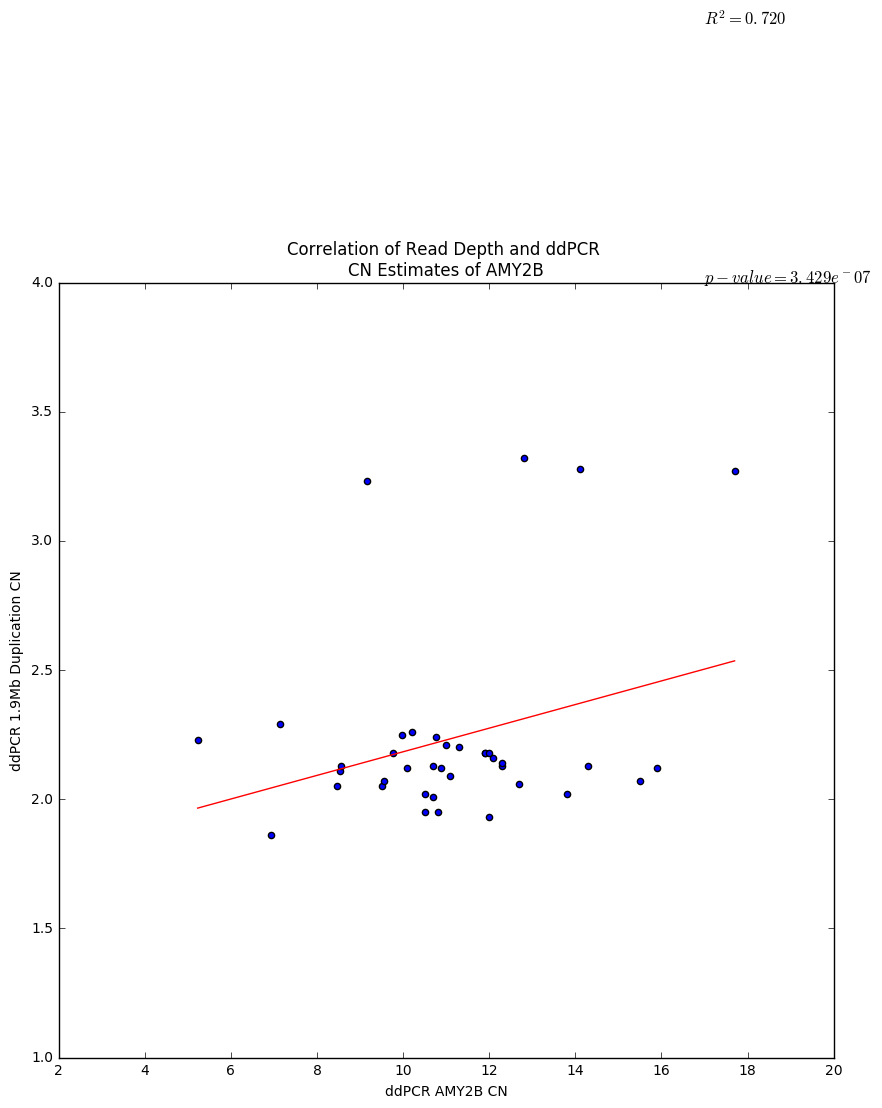

In [119]:
fig = plt.figure(figsize=(10,10))

ax = df.plot(kind='scatter', y='1.9Mb_ddPCR', x='AMY2B_ddPCR', ylim=(1,4),xlim=(2,20),figsize=(10,10),title="Correlation of Read Depth and ddPCR \nCN Estimates of AMY2B")
ax.set_ylabel("ddPCR 1.9Mb Duplication CN")
ax.set_xlabel("ddPCR AMY2B CN")

#to find line of best fit
y=df['1.9Mb_ddPCR']
x=df['AMY2B_ddPCR']
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='red')
#calculate r2
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print 'rvalue: ',r_value
print 'pvalue: ',p_value
ax.text(17,5,r'$R^2 = 0.720$',fontsize=12)
ax.text(17,4,r'$p-value = 3.429e^-07$',fontsize=12)

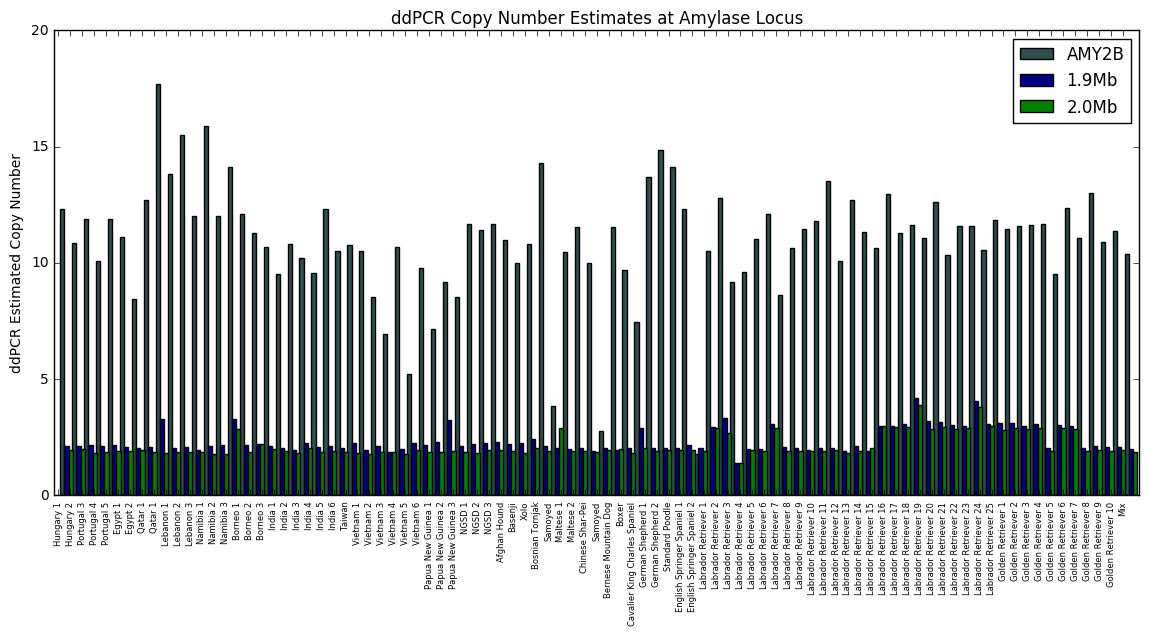

In [16]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)

CN_amy = []
CN_20 = []
CN_19 = []

## the data
N = len(plotOrder)
for i,items in enumerate(plotOrder):
    sample = plotOrder[i][1]
    CN_amy.append(get_amy_dd(plotOrder[i][0],ddData))
    CN_19.append(get_19_dd(plotOrder[i][0],ddData))
    CN_20.append(get_20_dd(plotOrder[i][0],ddData))
    names.append(sample)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind-width+.5, CN_amy, width,color='darkslategray')
rects2 = ax.bar(ind+.5, CN_19, width,color='navy')
rects3 = ax.bar(ind+width+.5, CN_20, width,color='green')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,20)
ax.set_ylabel('ddPCR Estimated Copy Number')
ax.set_title('ddPCR Copy Number Estimates at Amylase Locus')
xTickMarks = names
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=6)

## add a legend
ax.legend( (rects1[0], rects2[0],rects3[0]), ('AMY2B', '1.9Mb', '2.0Mb') )
plt.savefig(amyDir + 'results/' + 'Merged_CN_barplot_ddPCR.png')
plt.show()


In [13]:
amypos = 46954374

dupPos = [45193930,47107035]

#2mb starts at 45147007
largeDup = 45147007

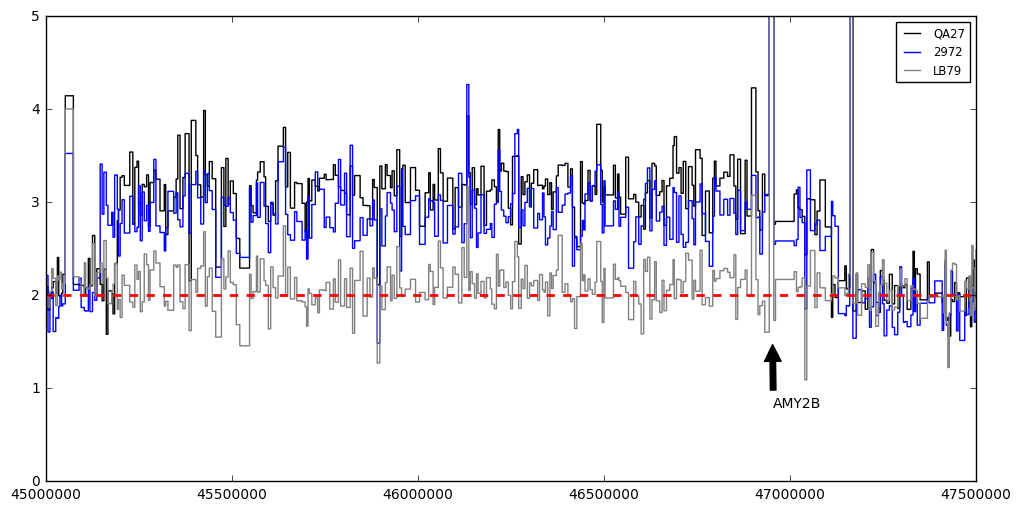

In [14]:
#making depth plots - ZOOMED OUT
fig = plt.figure(figsize=(12,6))

#Color list
colors = ['black', 'blue', 'gray']
index = -1

#plotting depth for the following samples:
for dog in ['QA27','2972','LB79']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,cnData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)

#Have commented out the boundary lines
#plt.axvline(x=dupPos[0],color='orange',linestyle = '--',linewidth=3)
#plt.axvline(x=dupPos[1],color='orange',linestyle = '--',linewidth=3)
#plt.axvline(x=45146000,color='pink',linestyle = '--',linewidth=3)

plt.xlim([45000000,47500000])
plt.ylim([0,5])
plt.axhline(y=2,color='red',linestyle='--',linewidth=2)
#plt.axhline(y=3,color='red',linestyle='--',linewidth=2)

ax = plt.axes()
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
ax.annotate('AMY2B', xy=(46954374, 1.5), xytext=(46956374, 0.8),arrowprops=dict(facecolor='black', shrink=0.05))

#ax.add_patch(patches.Rectangle((46000000, 0.5),10000,0.25,facecolor="red"))
#Plotting small legend
plt.legend(fontsize = 'small')
plt.savefig('/home/ampend/kidd-lab/ampend-projects/Angela/amy2b/results/ReadDepth_WholeLocus_AMY2BMarkedOnly.png')

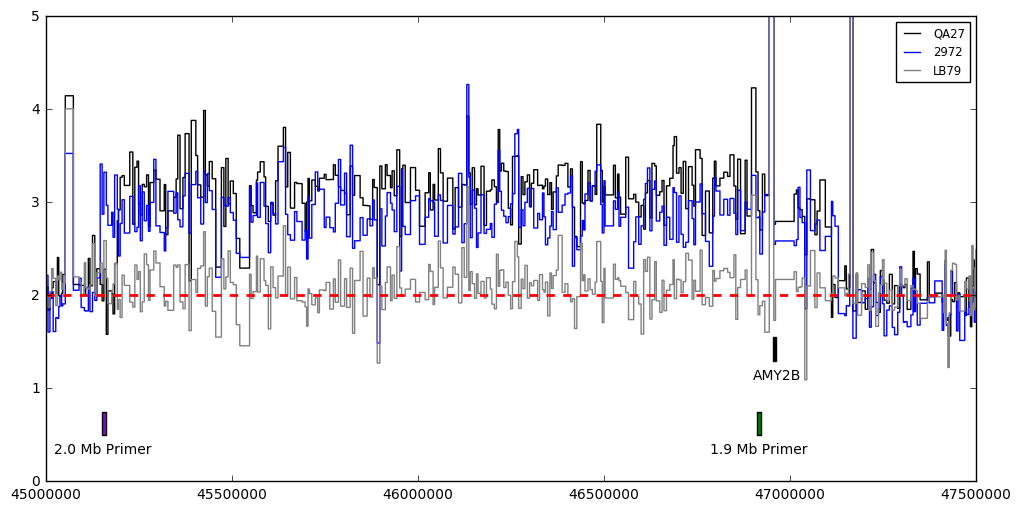

In [15]:
#making depth plots - ZOOMED OUT
fig = plt.figure(figsize=(12,6))

#Color list
colors = ['black', 'blue', 'gray']
index = -1

#plotting depth for the following samples:
for dog in ['QA27','2972','LB79']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,cnData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)

#Have commented out the boundary lines
#plt.axvline(x=dupPos[0],color='orange',linestyle = '--',linewidth=3)
#plt.axvline(x=dupPos[1],color='orange',linestyle = '--',linewidth=3)
#plt.axvline(x=45146000,color='pink',linestyle = '--',linewidth=3)

plt.xlim([45000000,47500000])
plt.ylim([0,5])
plt.axhline(y=2,color='red',linestyle='--',linewidth=2)
#plt.axhline(y=3,color='red',linestyle='--',linewidth=2)

ax = plt.axes()
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
#ax.annotate('1.9 Mb Primer', xy=(46912717, 1.3), xytext=(46785000, 0.2),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('2.0 Mb Primer', xy=(45153184, 1.3), xytext=(45023184, 0.2),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('AMY2B', xy=(46954374, 1.5), xytext=(46954374, 0.9),arrowprops=dict(facecolor='black', shrink=0.05))
ax.add_patch(patches.Rectangle((46912717, 0.5),10000,0.25,facecolor="green"))
ax.text(46785000, 0.3,'1.9 Mb Primer')
ax.add_patch(patches.Rectangle((45153184, 0.5),10000,0.25,facecolor="darkviolet"))
ax.text(45023184, 0.3,'2.0 Mb Primer')
ax.add_patch(patches.Rectangle((46954374, 1.3),10000,0.25,facecolor="black"))
ax.text(46900374, 1.1,'AMY2B')

#Plotting small legend
plt.legend(fontsize = 'small')
plt.savefig('/home/ampend/kidd-lab/ampend-projects/Angela/amy2b/results/ReadDepth_WholeLocus_AMY2BMarked_Primers.png')

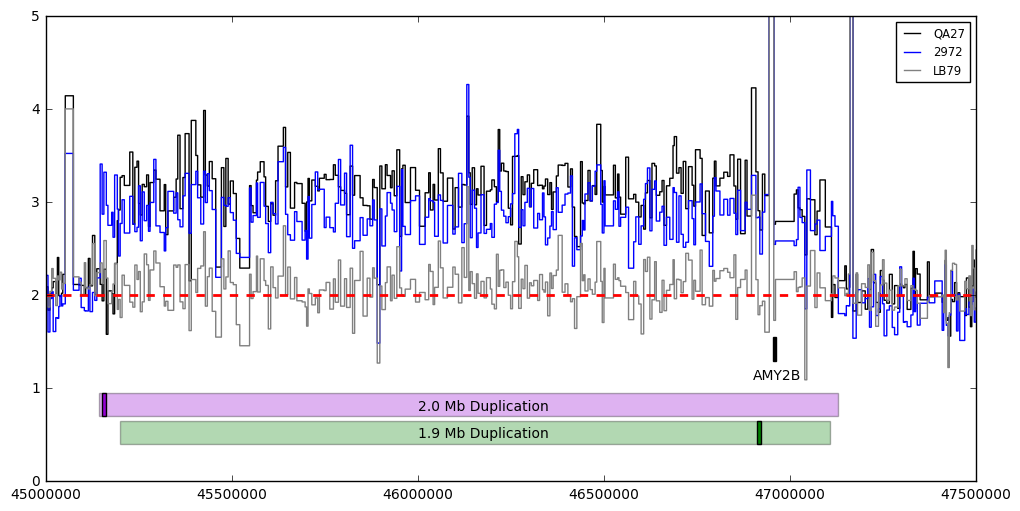

In [16]:
#making depth plots - ZOOMED OUT
fig = plt.figure(figsize=(12,6))

#Color list
colors = ['black', 'blue', 'gray']
index = -1

#plotting depth for the following samples:
for dog in ['QA27','2972','LB79']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,cnData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)

#Have commented out the boundary lines
#plt.axvline(x=dupPos[0],color='orange',linestyle = '--',linewidth=3)
#plt.axvline(x=dupPos[1],color='orange',linestyle = '--',linewidth=3)
#plt.axvline(x=45146000,color='pink',linestyle = '--',linewidth=3)

plt.xlim([45000000,47500000])
plt.ylim([0,5])
plt.axhline(y=2,color='red',linestyle='--',linewidth=2)
#plt.axhline(y=3,color='red',linestyle='--',linewidth=2)

ax = plt.axes()
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
#ax.annotate('1.9 Mb Primer', xy=(46912717, 1.3), xytext=(46785000, 0.2),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('2.0 Mb Primer', xy=(45153184, 1.3), xytext=(45023184, 0.2),arrowprops=dict(facecolor='black', shrink=0.05))
#ax.annotate('AMY2B', xy=(46954374, 1.5), xytext=(46954374, 0.9),arrowprops=dict(facecolor='black', shrink=0.05))
ax.add_patch(patches.Rectangle((45145000, 0.7),1985000,0.25,facecolor="darkviolet",alpha=0.3))
ax.add_patch(patches.Rectangle((45153184, 0.7),10000,0.25,facecolor="darkviolet"))
ax.text(46000000, 0.76,'2.0 Mb Duplication')
ax.add_patch(patches.Rectangle((45200000, 0.4),1910000,0.25,facecolor="green",alpha=0.3))
ax.add_patch(patches.Rectangle((46912717, 0.4),10000,0.25,facecolor="green"))
ax.text(46000000, 0.47,'1.9 Mb Duplication')
ax.add_patch(patches.Rectangle((46954374, 1.3),10000,0.25,facecolor="black"))
ax.text(46900374, 1.1,'AMY2B')

#Plotting small legend
plt.legend(fontsize = 'small')
plt.savefig('/home/ampend/kidd-lab/ampend-projects/Angela/amy2b/results/ReadDepth_WholeLocus_AMY2BMarked_Primers&Duplications.png')

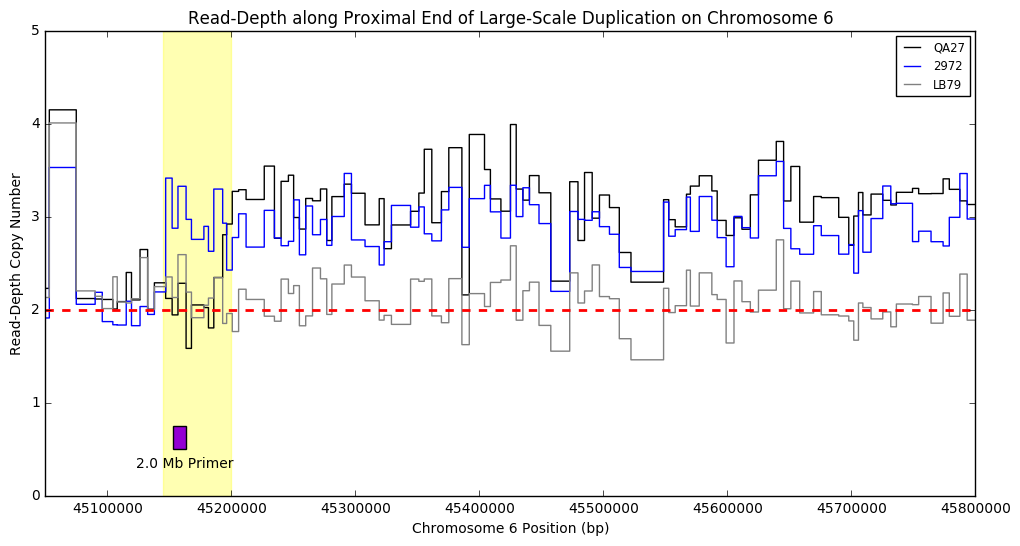

In [17]:
#making depth plots - ZOOMED IN PROXIMAL
fig = plt.figure(figsize=(12,6))
dupPos = [45193930,47107035]

#Color list
colors = ['black','blue', 'gray']
index = -1

#plotting depth for the following samples:
for dog in ['QA27','2972','LB79']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,cnData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)
#Setting plotting boundaries
plt.xlim([45050000,45800000])
plt.ylim([0,5])
#Diploid CN line
plt.axhline(y=2,color='red',linestyle='--',linewidth=2)
#Making arrow at amylase
ax = plt.axes()

#Highlighting difference in duplication at end of Dupe
plt.axvspan(45145000, 45200000, color='yellow', alpha=0.3)
#Indicating position of the 2.0Mb primer
ax.add_patch(patches.Rectangle((45153184, 0.5),10000,0.25,facecolor="darkviolet"))
ax.text(45123184, 0.3,'2.0 Mb Primer')

#Adding labels and titles
plt.ylabel('Read-Depth Copy Number')
plt.xlabel('Chromosome 6 Position (bp)')
plt.title('Read-Depth along Proximal End of Large-Scale Duplication on Chromosome 6')
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
#Plotting small legend
plt.legend(fontsize = 'small')
plt.savefig('/home/ampend/kidd-lab/ampend-projects/Angela/amy2b/results/ReadDepth_ProximalEnd.png')


## fig = plt.figure(figsize=(12,6))

#making depth plots - ZOOMED IN PROXIMAL
dupPos = [45193930,47107035]

#Color list
colors = ['black', 'blue', 'gray']
index = -1

#plotting depth for the following samples:
for dog in ['QA27','2972','LB79']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,cnData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)
#Setting plotting boundaries
plt.xlim([46800000,47200000])
plt.ylim([0,5])
#Diploid CN line
plt.axhline(y=2,color='red',linestyle='--',linewidth=2)
#Making arrow at amylase
ax = plt.axes()
ax.arrow(46954374,0,0,0.8,head_width=10000, head_length=.1, fc='k', ec='k')
#Highlighting difference in duplication at end of Dupe
plt.axvspan(47111000, 47131000, color='yellow', alpha=0.3)
plt.axvspan(45193930, 47107035, color='red', alpha=0.3)
#Adding labels and titles
plt.ylabel('Read-Depth Copy Number')
plt.xlabel('Chromosome 6 Position (bp)')
plt.title('Read-Depth along Distal End of Large-Scale Duplication on Chromosome 6')
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
#Plotting small legend
plt.legend(fontsize = 'small')

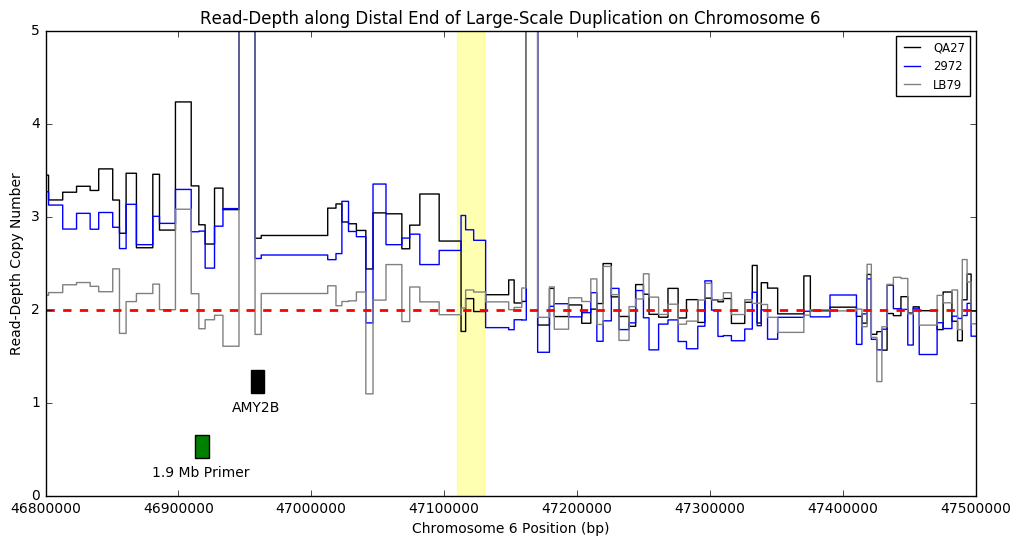

In [18]:
fig = plt.figure(figsize=(12,6))

#making depth plots - ZOOMED IN PROXIMAL
dupPos = [45193930,47107035]

#Color list
colors = ['black','blue', 'gray']
index = -1

#plotting depth for the following samples:
for dog in ['QA27','2972','LB79']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,cnData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)
#Setting plotting boundaries
plt.xlim([46800000,47500000])
plt.ylim([0,5])
#Diploid CN line
plt.axhline(y=2,color='red',linestyle='--',linewidth=2)
#Making arrow at amylase
ax = plt.axes()
#PLOT 1.9 MB PRIMER
ax.add_patch(patches.Rectangle((46912717, 0.4),10000,0.25,facecolor="green"))
ax.text(46880000, 0.2,'1.9 Mb Primer')
#PLOT AMY2B
ax.add_patch(patches.Rectangle((46954374, 1.1),10000,0.25,facecolor="black"))
ax.text(46940374, 0.9,'AMY2B')

#Highlighting difference in duplication at end of Dupe
plt.axvspan(47110000, 47130000, color='yellow', alpha=0.3)
#Adding labels and titles
plt.ylabel('Read-Depth Copy Number')
plt.xlabel('Chromosome 6 Position (bp)')
plt.title('Read-Depth along Distal End of Large-Scale Duplication on Chromosome 6')
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
#Plotting small legend
plt.legend(fontsize = 'small')
plt.savefig('/home/ampend/kidd-lab/ampend-projects/Angela/amy2b/results/ReadDepth_DistalEnd_AMY2BMarked_Primers.png')


In [19]:
#####ONLY 2MB DOGS##########
fig = plt.figure(figsize=(12,6))

#making depth plots - ZOOMED IN PROXIMAL
dupPos = [45193930,47107035]

#Color list
#colors = ['midnightblue','darkblue', 'mediumblue','blue','cornflowerblue','lightsteelblue','black']
colors = ['red','orange','yellow','green','blue','mediumpurple','black','black','black','gray']
index = -1

#plotting depth for the following samples:
for dog in ['10442','20576','14566','8542','2972','NA89','QA27','PG115','21270','VN76']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,rdData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)
#Setting plotting boundaries
plt.xlim([45100000,45300000])
#plt.xlim([46800000,47500000])
plt.ylim([0,5])
#Diploid CN line
plt.axhline(y=3,color='red',linestyle='--',linewidth=2)
#Making arrow at amylase
ax = plt.axes()
#PLOT AMY2B
ax.arrow(46954374,0,0,0.8,head_width=100000, head_length=.5, fc='k', ec='k')
#Highlighting difference in duplication at end of Dupe
plt.axvspan(47110000, 47130000, color='yellow', alpha=0.3)
#Indicating position of the 2.0Mb primer
ax.add_patch(patches.Rectangle((45153184, 0.5),10000,0.25,facecolor="darkviolet"))
ax.text(45151184, 0.3,'2.0 Mb Primer')
#Adding labels and titles
plt.ylabel('Read-Depth Copy Number')
plt.xlabel('Chromosome 6 Position (bp)')
plt.title('Read-Depth along Proximal End of Large-Scale Duplication on Chromosome 6')
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
#Plotting small legend
plt.legend(fontsize = 'small')


NameError: name 'rdData' is not defined

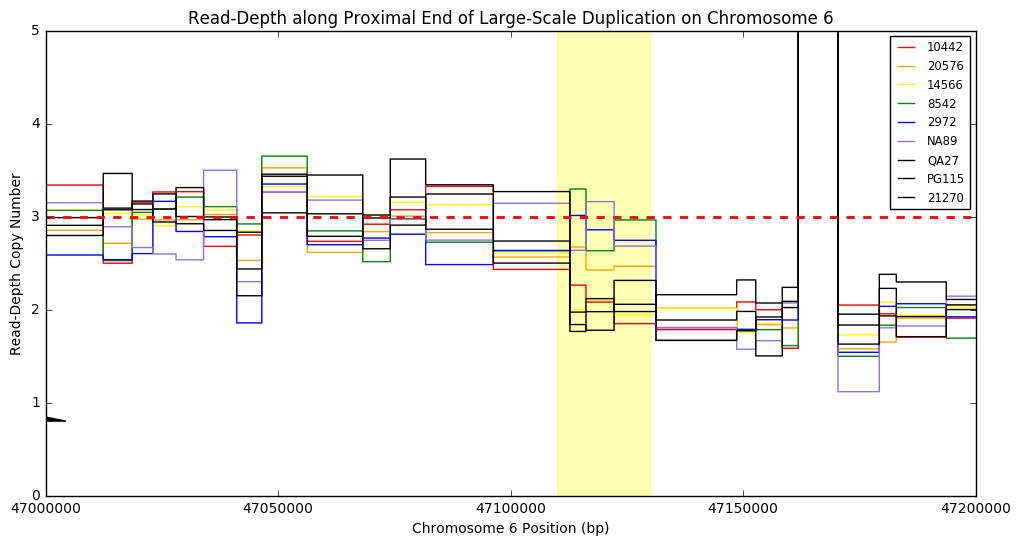

In [25]:
#####ONLY 2MB DOGS##########
fig = plt.figure(figsize=(12,6))

#making depth plots - ZOOMED IN PROXIMAL
dupPos = [45193930,47107035]

#Color list
#colors = ['midnightblue','darkblue', 'mediumblue','blue','cornflowerblue','lightsteelblue','black']
colors = ['red','orange','yellow','green','blue','mediumpurple','black','black','black']
index = -1

#plotting depth for the following samples:
for dog in ['10442','20576','14566','8542','2972','NA89','QA27','PG115','21270']:#,'QA27','PG115','NA89','2972','14566','PG122','10442']:    
    x,y = get_chr6_region(dog,rdData)
    index += 1
    Color = colors[index]
    plt.step(x, y, where='post',label=dog,color=Color)
#Setting plotting boundaries
plt.xlim([47000000,47200000])
#plt.xlim([46800000,47500000])
plt.ylim([0,5])
#Diploid CN line
plt.axhline(y=3,color='red',linestyle='--',linewidth=2)
#Making arrow at amylase
ax = plt.axes()
#PLOT AMY2B
ax.arrow(46954374,0,0,0.8,head_width=100000, head_length=.5, fc='k', ec='k')
#Highlighting difference in duplication at end of Dupe
plt.axvspan(47110000, 47130000, color='yellow', alpha=0.3)
#Adding labels and titles
plt.ylabel('Read-Depth Copy Number')
plt.xlabel('Chromosome 6 Position (bp)')
plt.title('Read-Depth along Proximal End of Large-Scale Duplication on Chromosome 6')
ax.ticklabel_format(useOffset=False,style='plain') #turns off sci notation
#Plotting small legend
plt.legend(fontsize = 'small')
plt.savefig('/home/ampend/kidd-lab/ampend-projects/Angela/amy2b/results/ReadDepth_ProximalEnd_AMY2BMarked.png')


In [22]:
#Determining the order I want to plot the dogs in for the bar plot FOR ddPCR ONLY
RDplotOrder = []

#inFile = open('sample-plot-order.txt')
inFile = open(amyDir + 'input/' + 'rd-sample-plot-order-2.txt')
for line in inFile:
    line = line.rstrip()
    line = line.split('\t')
    RDplotOrder.append([line[0],line[1],line[2],line[3],line[4]])
inFile.close()

In [23]:
import glob
dataDir = '/home/jmkidd/kidd-lab/jmkidd-projects/dogs/ancient-dog/wssd/'
fileList = glob.glob(dataDir + 'make-correct-depths/27july/3kb-windows-genome-regions/*amylase')

rdData = {}
for f in fileList:
    sn = f.split('/')[-1]
    sn = sn.split('.')[0]
    
    for i,items in enumerate(RDplotOrder):
        sampleID = RDplotOrder[i][0]
        if sampleID == sn:
            rdData[sn] = []
        else:
            continue
        inFile = open(f,'r')
        for line in inFile:
            line = line.rstrip()
            line = line.split()
            c = line[3]
            b = int(line[4])
            e = int(line[5])
            cn = float(line[6])
            rdData[sn].append([c,b,e,cn])
        # now, sort
        rdData[sn].sort()

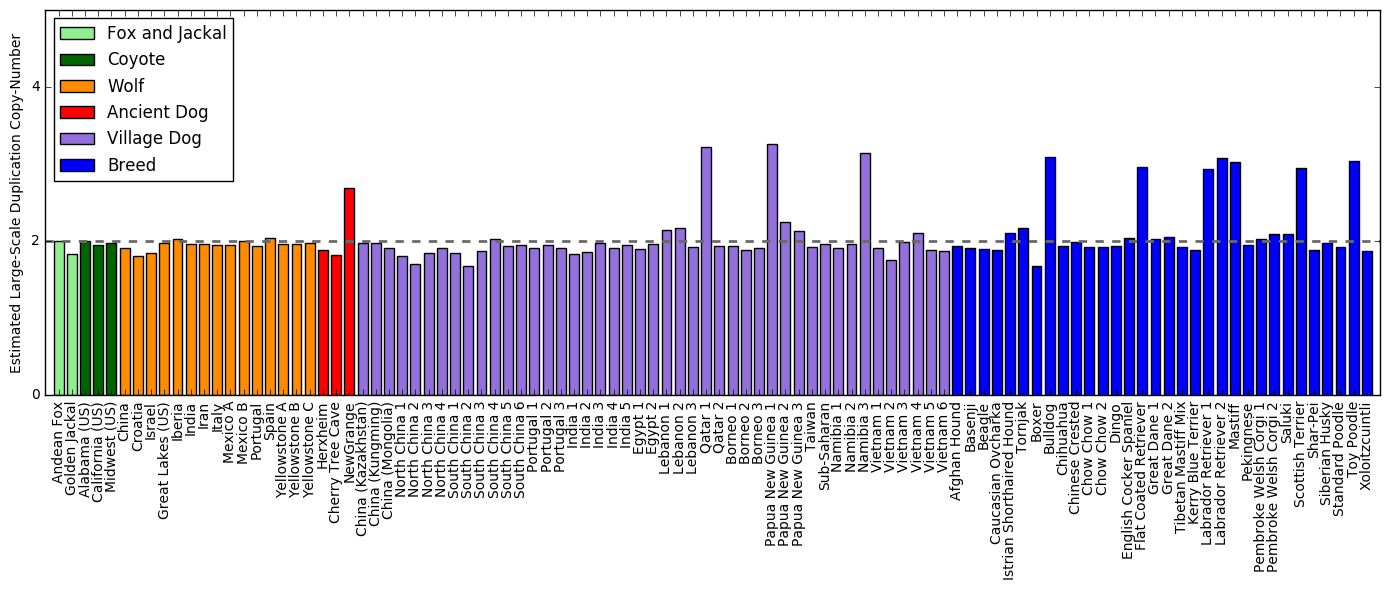

In [24]:
labelFont  = {'fontname':'Arial'}

width = .75

names = []
ticks = []
labels = {}
labels['Fox']  =1 
plt.figure(figsize=(14,6))
for i in range(len(RDplotOrder)):
    if RDplotOrder[i][2] == 'Fox':
        color = 'lightgreen'
    elif RDplotOrder[i][2] == 'Jackal':
        color = 'lightgreen'
    elif RDplotOrder[i][2] == 'Coyote':
        color = 'darkgreen'
    elif RDplotOrder[i][2] == 'Wolf':
        color = 'darkorange'
    elif RDplotOrder[i][2] == 'AncientDog':
        color = 'red'
    elif RDplotOrder[i][2] == 'Village Dog':
        color = 'mediumpurple'
    elif RDplotOrder[i][2] == 'Breed':
        color = 'blue'
    elif RDplotOrder[i][2] == 'New Guinea Singing Dog':
        color = 'steelblue'
    else:
        color = 'mediumpurple'
    if RDplotOrder[i][2] in labels:        
        _ = plt.bar(i,get_duplication_cn(RDplotOrder[i][0],rdData),width,align='center',color=color)
    else:
        l = RDplotOrder[i][2]
        labels[l] = 1
        if l == 'Jackal':
            l = 'Fox and Jackal'
            
        if l == 'AncientDog':
            l = 'Ancient Dog'

        if l == 'VillageDog':
            l = 'Village Dog'

            
            
        _ = plt.bar(i,get_duplication_cn(RDplotOrder[i][0],rdData),width,align='center',color=color,label=l)
    names.append(RDplotOrder[i][4])
    ticks.append(i)


_ =plt.xticks(ticks,names,rotation=90)
_= plt.xlim([-1,ticks[-1]+1])
_ = plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
_ = plt.ylim([0,5])

plt.legend(loc=2)

plt.axhline(y=2,color='dimgrey',linestyle='--',linewidth=2)
plt.ylabel('Estimated Large-Scale Duplication Copy-Number')
#plt.title('ddPCR Estimated AMY2B Duplication Copy Number')

plt.tight_layout()
plt.savefig(amyDir + 'results/' + 'dup_RD_barplot_AllSamples.png')

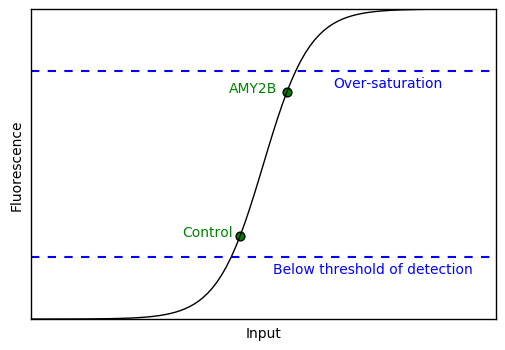

In [77]:
#making example linear range/ddPCR plot
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a



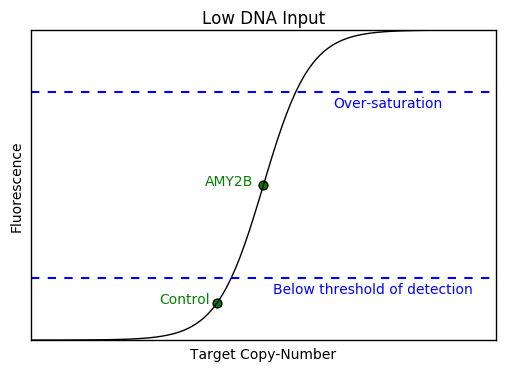

In [112]:
x = np.arange(-10, 10, 0.2)
sig = sigmoid(x)
plt.plot(x,sig,c="black")
#Add markers
ax = plt.axes()
x = [-2,0]
y = sigmoid(x)
c = 'gbrcyk'
ax.scatter(x,y,s=40,c="green")
plt.text(x[1]-2.5,y[1],'AMY2B',color="green")
plt.text(x[0]-2.5,y[0],'Control',color="green")
#Removes tick marks
plt.xticks([], [])
plt.yticks([], [])
#PLOT AMY2B
plt.axhline(0.2,color='blue',linestyle = '--',linewidth=1.5)
plt.text(0.4,0.15,'Below threshold of detection',color="blue")
plt.axhline(0.8,color='blue',linestyle = '--',linewidth=1.5)
plt.text(3,0.75,'Over-saturation',color="blue")
#X and Y axis labels
plt.xlabel('Target Copy-Number')
plt.ylabel('Fluorescence')
#Change x/ylim
plt.xlim(-10,10)
plt.ylim(0,1)
#Generates plot
plt.title('Low DNA Input')
plt.show()



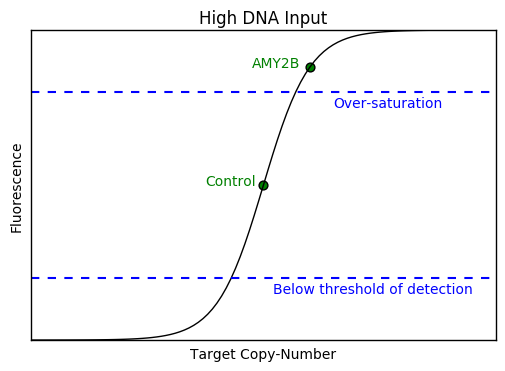

In [113]:
x = np.arange(-10, 10, 0.2)
sig = sigmoid(x)
plt.plot(x,sig,c="black")
#Add markers
ax = plt.axes()
x = [0,2]
y = sigmoid(x)
c = 'gbrcyk'
ax.scatter(x,y,s=40,c="green")
plt.text(x[1]-2.5,y[1],'AMY2B',color="green")
plt.text(x[0]-2.5,y[0],'Control',color="green")
#Removes tick marks
plt.xticks([], [])
plt.yticks([], [])
#PLOT AMY2B
plt.axhline(0.2,color='blue',linestyle = '--',linewidth=1.5)
plt.text(0.4,0.15,'Below threshold of detection',color="blue")
plt.axhline(0.8,color='blue',linestyle = '--',linewidth=1.5)
plt.text(3,0.75,'Over-saturation',color="blue")
#X and Y axis labels
plt.xlabel('Target Copy-Number')
plt.ylabel('Fluorescence')
#Change x/ylim
plt.xlim(-10,10)
plt.ylim(0,1)
#Generates plot
plt.title('High DNA Input')
plt.show()

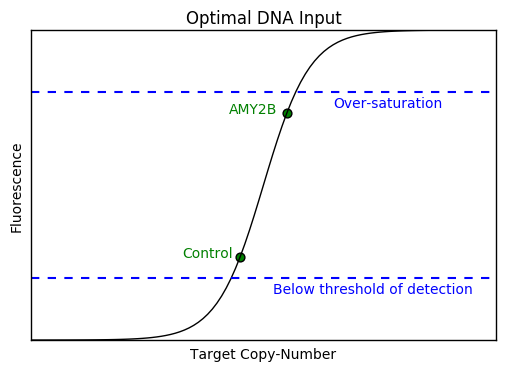

In [114]:
x = np.arange(-10, 10, 0.2)
sig = sigmoid(x)
plt.plot(x,sig,c="black")
#Add markers
ax = plt.axes()
x = [-1,1]
y = sigmoid(x)
c = 'gbrcyk'
ax.scatter(x,y,s=40,c="green")
plt.text(x[1]-2.5,y[1],'AMY2B',color="green")
plt.text(x[0]-2.5,y[0],'Control',color="green")
#Removes tick marks
plt.xticks([], [])
plt.yticks([], [])
#PLOT AMY2B
plt.axhline(0.2,color='blue',linestyle = '--',linewidth=1.5)
plt.text(0.4,0.15,'Below threshold of detection',color="blue")
plt.axhline(0.8,color='blue',linestyle = '--',linewidth=1.5)
plt.text(3,0.75,'Over-saturation',color="blue")
#X and Y axis labels
plt.xlabel('Target Copy-Number')
plt.ylabel('Fluorescence')
#Change x/ylim
plt.xlim(-10,10)
plt.ylim(0,1)
#Generates plot
plt.title('Optimal DNA Input')
plt.show()